In [1]:
#!pwd
#!source activate sed_env

In [2]:
import pandas as pd
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import splat
import astropy.units as u
from sedkit import SED
import astropy.units as u
from bokeh.io import output_notebook
from bokeh.plotting import show
from pkg_resources import resource_filename
output_notebook()
#%matplotlib inline

/users/caganze/research/splat


Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




Loading BokehJS ...

In [3]:
#from astroquery.svo_fps import SvoFps
DATA_FOLDER='/users/caganze/research/J1624/data/'
FIG_FOLDER='/users/caganze/research/J1624/figures/'

In [4]:
import sys
sys.version

'3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:58:48) [Clang 11.1.0 ]'

In [5]:
castar = SED(name='J1624')
castar.ra=246.0684208*u.deg
castar.dec=-32.2037824*u.deg
#spectral type
castar.spectral_type = (65, 0.0)
castar.age=(5.0*u.Gyr, 2.9*u.Gyr)
castar.parallax=(59.01*u.mas, 0.12*u.mas)
#wise photometry
castar.add_photometry('WISE.W1', 7.936, 0.026)
castar.add_photometry('WISE.W2', 7.768, 0.020)
castar.add_photometry('WISE.W3', 7.650, 0.018)
castar.add_photometry('WISE.W4', 7.329, 0.154)
#2mass photometry
castar.add_photometry('2MASS.J', 9.150, 0.026)
castar.add_photometry('2MASS.H', 8.470, 0.029)
castar.add_photometry('2MASS.Ks', 8.154, 0.023) 

#gaia photometry
#castar.add_photometry('PS1.g', 14.6207, 0.0012)
castar.add_photometry('Gaia.G', 12.9, 0.0139)
castar.add_photometry('Gaia.bp', 14.2129, 0.0045)
castar.add_photometry('Gaia.rp', 11.0375, 0.0030)

#add optical V band photometry
castar.add_photometry('Johnson.V', 13.96, 0.039)
#castar.add_photometry('Johnson.B', 15.745, 0.03)

[sedkit] SED initialized
[sedkit] Setting name to 'J1624'
[sedkit] Setting sky_coords to <SkyCoord (ICRS): (ra, dec) in deg
    (246.0684208, -32.2037824)>
[sedkit] There was a problem determining the interstellar reddening. Setting to 0. You can manually set this with the 'reddening' attribute.
[sedkit] Setting radius to 'None'
[sedkit] Setting radius to (<Quantity 0.24 solRad>, <Quantity 0.02 solRad>, <Quantity 0.02 solRad>) with reference '2013ApJS..208....9P'
[sedkit] Setting spectral_type to (65, 0.5, 'V', None, None) with reference 'None'
[sedkit] Setting age to (<Quantity 5. Gyr>, <Quantity 2.9 Gyr>) with reference 'None'
[sedkit] Setting parallax to (<Quantity 59.01 mas>, <Quantity 0.12 mas>) with reference 'None'
[sedkit] Setting distance to (<Quantity 16.95 pc>, <Quantity 0.03 pc>, <Quantity 0.03 pc>) with reference 'None'
[sedkit] There was a problem determining the interstellar reddening. Setting to 0. You can manually set this with the 'reddening' attribute.
[sedkit] Setti

In [6]:
castar.find_SDSS()

[sedkit] 0 records found in 'SDSS' using target name 'J1624'
[sedkit] 0 records found in 'SDSS' using 20.0 arcsec radius around <SkyCoord (ICRS): (ra, dec) in deg
    (246.0684208, -32.2037824)>


In [7]:
#find v band photometry
castar.find_Simbad()

In [8]:
#s=splat.Spectrum(wave=df['wave (micron)'].values*u.micron,
#                flux=df['flux (funits)'].values*u.erg/u.micron/u.s/(u.cm**2),
#                noise=df['noise'].values*u.erg/u.micron/u.s/(u.cm**2))
#add a mask
#mask=df['mask']
#MASK OUT OPTICAL SPECTRUM
#mask=np.logical_or(mask, s.wave.value<1.0)
from sedkit import Spectrum

In [9]:
#import kastredux
FUNITS=u.erg/u.micron/u.s/(u.cm**2)
WUNITS=u.micron

In [10]:
import kastredux
fr='/users/caganze/research/J1624/data/kastRED_J1624-3212_20210404.txt'
sred=kastredux.readSpectrum(fr)
sred_splat=splat.Spectrum(wave=sred.wave, flux=sred.flux, noise=sred.unc)
sred_splat.toWaveUnit(WUNITS)
sxd_splat= splat.Spectrum(DATA_FOLDER+'/spex-sxd-merged_J1624-3212_210407.fits', instrument='SXD')



Welcome to the KASTredux reduction package!
This package was developed by Adam Burgasser (aburgasser@ucsd.edu)
You are currently using version 2021.11.06
If you make use of any spectra or models in this package, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/kastredux/




In [11]:
#castar.photometry

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


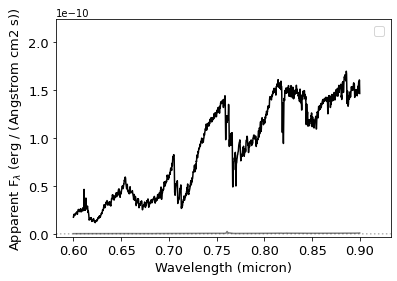

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [12]:
sred_splat.fluxCalibrate('Gaia G',  12.9)
sred_splat.mask([0, 0.6000])
sred_splat.mask([0.9000, 1.0000])
sred_splat.plot()

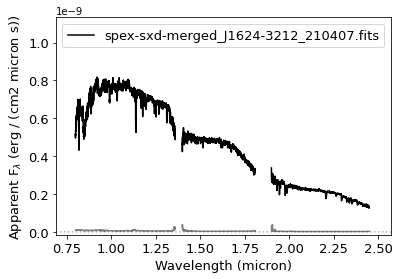

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [13]:
sxd_splat.reset()
sxd_splat.fluxCalibrate('2MASS J', 9.150 )
sxd_splat.mask([ 1.36, 1.40])
sxd_splat.mask([ 1.81, 1.90])
sxd_splat.mask([2.45, 3.0])
sxd_splat.mask([0., 0.8])
sxd_splat.plot()

In [14]:
#opt_blue=Spectrum(blue[0]*WUNITS, blue[1]*FUNITS, blue[-1]*FUNITS, name='J1624 blue')
#opt_red=Spectrum(red[0]*WUNITS, red[1]*FUNITS, red[-1]*FUNITS, name='J1624 red
sxd=Spectrum(sxd_splat.wave[~np.isnan( sxd_splat.flux)], sxd_splat.flux[~np.isnan( sxd_splat.flux)], \
             sxd_splat.noise[~np.isnan( sxd_splat.flux)])
red_opt=Spectrum(sred_splat.wave[~np.isnan(sred_splat.flux)],\
                 sred_splat.flux[~np.isnan(sred_splat.flux)], \
                 sred_splat.noise[~np.isnan(sred_splat.flux)])

In [15]:
sxd.flux

array([5.1563254e-10, 4.9582838e-10, 5.0257176e-10, ..., 1.3275316e-10,
       1.2821666e-10, 1.3006431e-10], dtype=float32)

In [16]:

#castar.add_spectrum(opt_blue)
#castar.add_spectrum(opt_red)
#castar.add_spectrum(sxd)

In [17]:
#calibrated_spec=sxd.flux_calibrate(castar.distance)
#calibrated_opt=red_opt.flux_calibrate(castar.distance)

In [18]:
#sxd.flux_calibrate?

In [19]:
castar.add_spectrum(sxd)
castar.add_spectrum(red_opt)

[sedkit] Spectrum 'New Spectrum' added with reference 'None'
[sedkit] Spectrum 'New Spectrum' added with reference 'None'


In [20]:
sxd.flux

array([5.1563253e-14, 4.9582835e-14, 5.0257175e-14, ..., 1.3275315e-14,
       1.2821666e-14, 1.3006431e-14], dtype=float32)

In [21]:
# Fit to infer spectral type
castar.fit_spectral_type()

[sedkit] Setting fbol to (<Quantity 1.09316764e-09 erg / (cm2 s)>, <Quantity 2.81502983e-12 erg / (cm2 s)>) with reference 'This Work'
[sedkit] Setting Lbol to (<Quantity 3.75782999e+31 erg / s>, <Quantity 1.64494912e+29 erg / s>) with reference 'This Work'
[sedkit] Setting Lbol_sun to (-2.008, 0.002) with reference 'This Work'
[sedkit] Setting mbol to (10.921, 0.003) with reference 'This Work'
[sedkit] Setting Mbol to (9.775, 0.004) with reference 'This Work'
[sedkit] Setting logg to 'None'
[sedkit] -2.01: Lbol must be between -5.35 and -3.08 to infer logg from DUSTY00 isochrones.
[sedkit] -2.008: Lbol must be between -5.29 and -3.08 to infer logg from DUSTY00 isochrones.
[sedkit] -2.006: Lbol must be between -5.35 and -3.08 to infer logg from DUSTY00 isochrones.
[sedkit] Could not calculate surface gravity.
[sedkit] Setting logg to 'None'
[sedkit] Setting mass to 'None'
[sedkit] Setting mass to (<Quantity 0.31 solMass>, <Quantity 0. solMass>, <Quantity 0. solMass>) with reference '20

In [22]:
#castar.best_fit

In [23]:

# Fit to infer fundamental params
from sedkit import BTSettl
#castar.fit_modelgrid(BTSettl())
#castar.make_sed
#castar.fit_blackbody()

In [24]:
from bokeh.plotting import  output_file, save
#f=castar.plot(integral=True, best_fit=True, one_color=False)

In [25]:
#castar.results

In [26]:
#castar.fit_modelgrid?

In [27]:

#castar.fit_spectral_type()
castar.fit_modelgrid(BTSettl(), fit_to='phot', mcmc=True)

100%|█████████████████████████████████████████| 100/100 [00:46<00:00,  2.17it/s]

[sedkit] Best fit BT-Settl phot: 0.0/5.5/3067.0574958965713/0.0


In [28]:
castar.fit_modelgrid(BTSettl(), fit_to='spec', mcmc=False)

[sedkit] Best fit BT-Settl spec: 3000.0/5.5/0.0/0.0


In [29]:
#add model
castar.best_fit

{'SpeX Prism Library spec': {'spty': 'Opt:M4V',
  'filepath': '/Users/jfilippazzo/Documents/Modules/sedkit/sedkit/data/models/atmospheric/spexprismlibrary/spex-prism_LP508-14_20030521_BUR04B.txt.xml',
  'spectrum': array([[6.5830499e-01, 6.6048795e-01, 6.6266298e-01, ..., 2.5550199e+00,
          2.5579801e+00, 2.5609500e+00],
         [2.5373494e-14, 2.2691735e-14, 2.2848102e-14, ..., 8.9463611e-15,
          8.9722922e-15, 9.5042729e-15]], dtype=float32),
  'label': 'Opt:M4V',
  'SpT': 64.0,
  'gstat': 0.28842105790204264,
  'const': 8.672652329861611e-13,
  'wave_units': Unit("um"),
  'flux_units': Unit("erg / (Angstrom cm2 s)"),
  'fit_to': 'spec',
  'full_model': <sedkit.spectrum.Spectrum at 0x16648df90>},
 'BT-Settl phot': {'teff': 3067.0574958965713,
  'N0': 1.779188332796104,
  'N1': 0.6591746381992261,
  'N2': 0.257324331331221,
  'ln(s)': -3.2360423745234383,
  'teff_unc': 966.4259413124855,
  'N0_unc': 1.9529345311770765,
  'N1_unc': 1.3054871906161338,
  'N2_unc': 1.3359981

In [30]:
castar.best_fit_fill?

In [31]:
castar.spectra

name,spectrum,wave_min,wave_max,wave_bins,resolution,history,ref
,,um,um,,,,
object,object,float16,float16,int64,int64,object,object
New Spectrum,<sedkit.spectrum.Spectrum object at 0x1728b5600>,0.80029296875,2.44921875,6063,6056,{},None
New Spectrum,<sedkit.spectrum.Spectrum object at 0x1720db250>,0.60009765625,0.89990234375,2333,2331,{},None


In [32]:
#best_fit model
#best_model=Spectrum(*)

In [33]:
f=castar.plot(integral=True, best_fit=True, one_color=False, synthetic_photometry=True, blackbody=False)


In [34]:
castar.results

param,value,unc,units
object,object,object,object
name,J1624,--,--
ra,246.0684208,--,--
dec,-32.2037824,--,--
age,5.0,2.9,Gyr
membership,--,--,--
distance,16.95,0.03,pc
...,...,...,...
Teff,3708,154,K
logg,--,--,--


In [35]:
castar.calculate_synthetic_photometry()

In [36]:
castar.fundamental_params()

[sedkit] Setting fbol to (<Quantity 1.09316764e-09 erg / (cm2 s)>, <Quantity 2.81502983e-12 erg / (cm2 s)>) with reference 'This Work'
[sedkit] Setting Lbol to (<Quantity 3.75782999e+31 erg / s>, <Quantity 1.64494912e+29 erg / s>) with reference 'This Work'
[sedkit] Setting Lbol_sun to (-2.008, 0.002) with reference 'This Work'
[sedkit] Setting Mbol to (9.775, 0.004) with reference 'This Work'
[sedkit] Setting logg to 'None'
[sedkit] -2.01: Lbol must be between -5.35 and -3.08 to infer logg from DUSTY00 isochrones.
[sedkit] -2.008: Lbol must be between -5.29 and -3.08 to infer logg from DUSTY00 isochrones.
[sedkit] -2.006: Lbol must be between -5.35 and -3.08 to infer logg from DUSTY00 isochrones.
[sedkit] Could not calculate surface gravity.
[sedkit] Setting logg to 'None'
[sedkit] Setting Teff to (<Quantity 3708 K>, <Quantity 154 K>) with reference 'This Work'


In [37]:
import matplotlib as mpl
#matplotlib defaults
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 18
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'
mpl.rcParams['xtick.bottom']=True
mpl.rcParams['xtick.top']=True
mpl.rcParams['xtick.major.width']=0.9
mpl.rcParams['xtick.minor.width']=0.9
mpl.rcParams['ytick.major.width']=0.9
mpl.rcParams['ytick.minor.width']=0.9
mpl.rcParams['ytick.right']=True
mpl.rcParams['ytick.left']=True
mpl.rcParams['xtick.direction']='in'
mpl.rcParams['ytick.direction']='in'

mpl.rcParams['font.serif'] = 'Ubuntu'
#mpl.rcParams['font.monospace'] = 'Ubuntu Mono'
mpl.rcParams["mathtext.fontset"] = "dejavuserif"

mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['figure.titlesize'] = 18

In [38]:
 #castar.stitched_spectra[1].flux

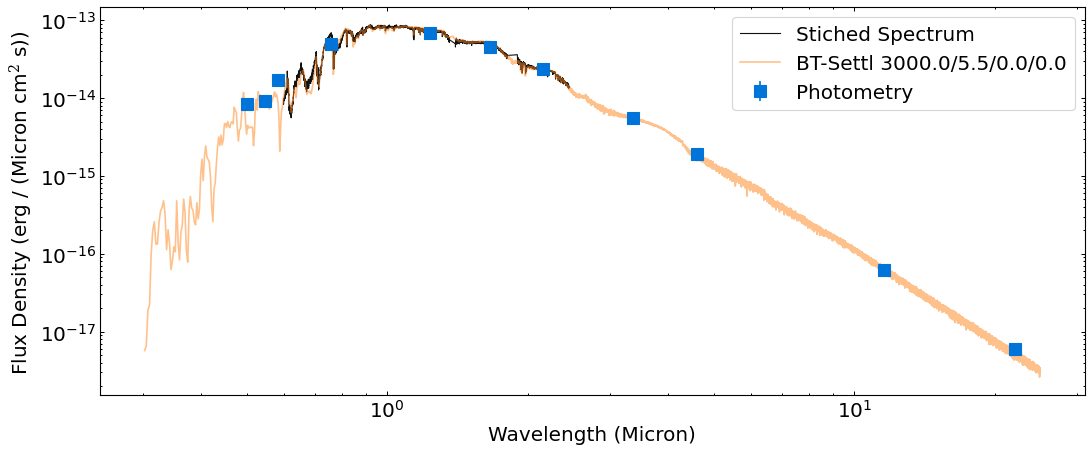

In [45]:
fig, ax=plt.subplots(figsize=(14, 6))

#ax.errorbar(castar.stitched_spectra[0].wave, castar.stitched_spectra[0].flux, 
#            yerr=castar.stitched_spectra[0].unc, fmt='.') 
#ax.plot(castar.stitched_spectra[-1].wave, castar.stitched_spectra[-1].flux, c='k', label='KAST Blue')
ax.plot(castar.stitched_spectra[0].wave, castar.stitched_spectra[0].flux, c='#111111', lw=1, label='Stiched Spectrum')
#ax.plot(castar.stitched_spectra[1].wave, castar.stitched_spectra[1].flux, c='#111111', lw=2,)
#plt.plot(castar.app_phot_SED.wave, castar.app_phot_SED.flux)
#plt.plot(castar.best_fit['BT-Settl phot']['spectrum'][0], 
#         castar.best_fit['BT-Settl phot']['spectrum'][-1] , \
#         alpha=0.5, label='BT-Settl {}'.format(castar.__dict__['BT-Settl phot']), color='#FF851B')

plt.plot(castar.best_fit['BT-Settl spec']['spectrum'][0], 
         castar.best_fit['BT-Settl spec']['spectrum'][-1] , \
         alpha=0.5, label='BT-Settl {}'.format(castar.__dict__['BT-Settl spec']), color='#FF851B')

ax.errorbar(castar._photometry['eff'].value,
             castar._photometry['app_flux'].value, 
             yerr= castar._photometry['app_flux_unc'].value, fmt='s', \
            label='Photometry', ms=10, color='#0074D9')

#ax.errorbar(castar._synthetic_photometry['eff'].value,
#             castar._synthetic_photometry['app_flux'].value, 
#             yerr= castar._synthetic_photometry['app_flux_unc'].value, fmt='o', label='Synth Photometry')


ax.set(xscale= 'log', yscale='log', 
       xlabel='Wavelength (Micron)',
       ylabel=r'Flux Density (erg / (Micron cm$^2$ s)) ')
plt.tight_layout()
plt.legend(fontsize=18)
plt.savefig(FIG_FOLDER+'/sed_fit.pdf')